In [9]:
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)
from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot as plt

https://github.com/barbagroup/CFDPython/blob/master/lessons/05_Step_4.ipynb

In [3]:
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))
phi

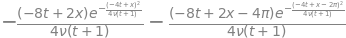

In [4]:
phiprime = phi.diff(x)
phiprime

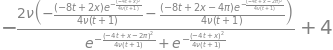

In [5]:
u = -2 * nu * (phiprime / phi) + 4
u

In [8]:
ufunc = lambdify((t,x,nu),u)
ufunc(1,4,3)

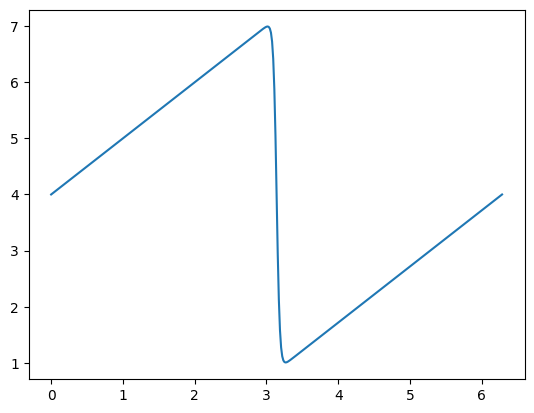

In [54]:
nx = 401
nt = 100
dx = 2 * np.pi / (nx - 1)

nu = 0.07
dt = dx * nu

x = np.linspace(0,2*np.pi,nx)
un = np.zeros(nx)

t = 0

u = np.asarray([ufunc(t, x0, nu) for x0 in x])
plt.plot(x, u, label='t=0')

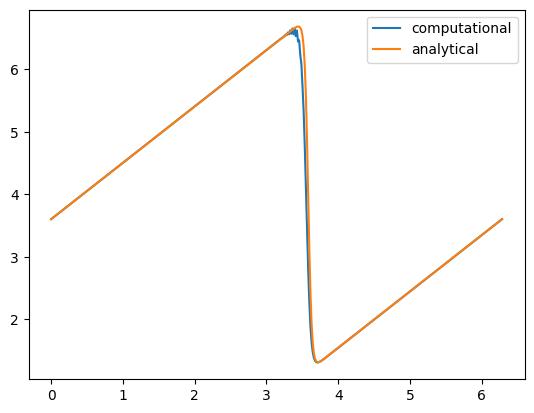

In [55]:
# u = np.zeros(nx)
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
         u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[-1] = un[-1] - un[-1] * dt / dx *(un[-1] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[-1] + un[-2])
    u[0] = u[-1]
    
u_analy = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

plt.plot(x, u, label='computational')
plt.plot(x, u_analy, label='analytical')
plt.legend();

